In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [7]:
x_data = np.linspace(0.0, 10.0 , 1000000)

In [8]:
noise = np.random.randn(len(x_data))

In [9]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [18]:
# y = mx + b
y_true = (0.8 * x_data) + 8 + noise

In [19]:
x_df = pd.DataFrame(data=x_data , columns=["X Data"])


In [20]:
y_df = pd.DataFrame(data= y_true, columns=["Y"])


In [21]:
y_df.head()


,Y
0,7.027867
1,8.100652
2,9.332324
3,7.160900
4,7.415007


In [22]:
# concat the data
my_concat = pd.concat([x_df, y_df] , axis=1)


In [23]:
my_concat


,X Data,Y
0,0.00000,7.027867
1,0.00001,8.100652
2,0.00002,9.332324
3,0.00003,7.160900
4,0.00004,7.415007
5,0.00005,8.370120
6,0.00006,8.079972
7,0.00007,5.887509
8,0.00008,8.928651
9,0.00009,7.717965


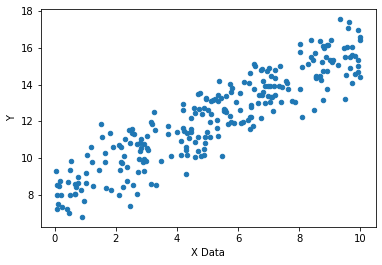

In [24]:
# now take a small sample
my_concat.sample(n = 250).plot(kind='scatter', x = "X Data", y= "Y")

In [25]:
# we wanna feed these points but its too much at once so we will use batches

batch_size = 8

In [26]:
# random variables just to prove our model
random_val = np.random.randn(2)

In [27]:
random_val

array([0.79262939, 0.76694192])

In [28]:
# Get some random variables
m = tf.Variable(0.27)
b = tf.Variable(0.66)

In [29]:
# Get our placeholders
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])


In [30]:
# defining operations for our graph
y_model = m*xph + b


In [31]:
# true y-value - the prediction
error = tf.reduce_sum(tf.square(yph - y_model))


In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    # feeding 1000 batches each of size 8 so 8000
    batches = 10000
    
    for i in range(batches):
        
        # getting random indexes from 0 to 8 and we grabbing 8 of them
        rand_in = np.random.randint(len(x_data) , size=batch_size)
        # feeding x data point and to its y label
        # were also grabbing 8 random data points
        feed = {xph: x_data[rand_in] , yph:y_true[rand_in]}
        sess.run(train , feed_dict= feed)
        
        
   # now we grab the slope and intercept
    model_m, model_b = sess.run([m,b])
    

In [35]:
# our slope is looking good since we originally said 0.5
model_m

0.8108988

In [36]:
# out intercept is good since we originally said 5
model_b

7.925995

In [37]:
y_hat = model_m * x_data + model_b

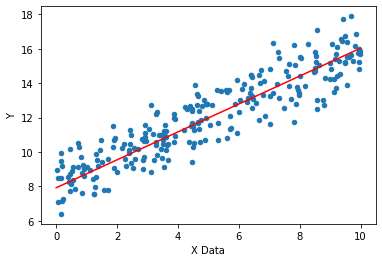

In [38]:
my_concat.sample(n = 250).plot(kind='scatter', x = "X Data", y= "Y")
plt.plot(x_data , y_hat, 'r' )
